In [3]:
import pandas as pd
import networkx as nx
import os
import numpy as np

# Tables to Networks, Networks to Tables

Networks can be represented in a tabular form in two ways: As an adjacency list with edge attributes stored as columnar values, and as a node list with node attributes stored as columnar values.

Storing the network data as a single massive adjacency table, with node attributes repeated on each row, can get unwieldy, especially if the graph is large, or grows to be so. One way to get around this is to store two files: one with node data and node attributes, and one with edge data and edge attributes. 

The Divvy bike sharing dataset is one such example of a network data set that has been stored as such.

# Loading Node Lists and Adjacency Lists

Let's use the Divvy bike sharing data set as a starting point. The Divvy data set is comprised of the following data:

- Stations and metadata (like a node list with attributes saved)
- Trips and metadata (like an edge list with attributes saved)

The `README.txt` file in the Divvy directory should help orient you around the data.

In [4]:
stations = pd.read_csv('datasets/divvy_2013/Divvy_Stations_2013.csv', parse_dates=['online date'], index_col='id')
stations

,name,latitude,longitude,dpcapacity,landmark,online date
id,,,,,,
5,State St & Harrison St,41.873958,-87.627739,19,30,2013-06-28
13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,66,2013-06-28
14,Morgan St & 18th St,41.858086,-87.651073,15,163,2013-06-28
15,Racine Ave & 18th St,41.858181,-87.656487,15,164,2013-06-28
16,Wood St & North Ave,41.910329,-87.672516,15,223,2013-08-12
17,Wood St & Division St,41.903320,-87.672730,15,246,2013-06-28
19,Loomis St & Taylor St,41.869417,-87.660996,15,139,2013-06-28
20,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15,154,2013-06-28
21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,157,2013-06-28


In [5]:
trips = pd.read_csv('datasets/divvy_2013/Divvy_Trips_2013.csv', parse_dates=['starttime', 'stoptime'], index_col=['trip_id'])
trips = trips.sort()
trips

/Users/ericmjl/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday
trip_id,,,,,,,,,,,
3940,2013-06-27 01:06:00,2013-06-27 09:46:00,914,31177,91,Clinton St & Washington Blvd,48,Larrabee St & Kingsbury St,Subscriber,Male,1982
4095,2013-06-27 12:06:00,2013-06-27 12:11:00,480,301,85,Michigan Ave & Oak St,85,Michigan Ave & Oak St,Subscriber,Male,1982
4113,2013-06-27 11:09:00,2013-06-27 11:11:00,711,140,88,May St & Randolph St,88,May St & Randolph St,Subscriber,Male,1982
4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
4119,2013-06-27 11:12:00,2013-06-27 11:13:00,711,87,88,May St & Randolph St,88,May St & Randolph St,Subscriber,Male,1982
4134,2013-06-27 11:24:00,2013-06-27 14:38:00,145,11674,17,Wood St & Division St,61,Wood St & Milwaukee Ave,Subscriber,Male,1978
4162,2013-06-27 11:39:00,2013-06-27 16:01:00,711,15758,88,May St & Randolph St,34,Cannon Dr & Fullerton Ave,Subscriber,Male,1982
4192,2013-06-27 12:15:00,2013-06-27 12:16:00,303,60,28,Larrabee St & Menomonee St,28,Larrabee St & Menomonee St,Subscriber,Male,1982
4216,2013-06-27 13:00:00,2013-06-27 13:03:00,907,171,45,Michigan Ave & Congress Pkwy,90,Millennium Park,Subscriber,Male,1982


At this point, we have our `stations` and `trips` data loaded into memory. 

How we construct the graph depends on the kind of questions we want to answer, which makes the definition of the "unit of consideration" (or the entities for which we are trying to model their relationships) is extremely important. 

Let's try to answer the question: "What are the most popular trip paths?" In this case, the bike station is a reasonable "unit of consideration", so we will use the bike stations as the nodes. 

To start, let's initialize an directed graph `G`.

In [6]:
G = nx.DiGraph()

Then, let's iterate over the `stations` DataFrame, and add in the node attributes.

In [7]:
for r, d in stations.iterrows(): # call the pandas DataFrame row-by-row iterator
    G.add_node(r, attr_dict=d.to_dict())

In order to answer the question of "which stations are important", we need to specify things a bit more. Perhaps a measure such as **betweenness centrality** or **degree centrality** may be appropriate here.

The naive way would be to iterate over all the rows. Go ahead and try it at your own risk - it may take a long time :-). Alternatively, I would suggest doing a `pandas` `groupby`.

In [8]:
# # Run the following code at your own risk :)
# for r, d in trips.iterrows():
#     start = d['from_station_id']
#     end = d['to_station_id']
#     if (start, end) not in G.edges():
#         G.add_edge(start, end, count=1)
#     else:
#         G.edge[start][end]['count'] += 1

In [9]:
for (start, stop), d in trips.groupby(['from_station_id', 'to_station_id']):
    G.add_edge(start, stop, count=len(d))

First off, let's figure out how dense the graph is. The graph's density is the number of edges divided by the total number of nodes.

NetworkX provides an implementation of graph density, but it assumes self-loops are not allowed. (Self-loops are edges from one node to itself.) Let's see what the graph density is 

In [10]:
G.edges(data=True)

[(5, 5, {'count': 232}),
 (5, 13, {'count': 1}),
 (5, 14, {'count': 15}),
 (5, 15, {'count': 9}),
 (5, 16, {'count': 4}),
 (5, 17, {'count': 7}),
 (5, 19, {'count': 13}),
 (5, 21, {'count': 16}),
 (5, 22, {'count': 18}),
 (5, 23, {'count': 5}),
 (5, 24, {'count': 36}),
 (5, 25, {'count': 62}),
 (5, 26, {'count': 55}),
 (5, 27, {'count': 4}),
 (5, 28, {'count': 4}),
 (5, 29, {'count': 12}),
 (5, 31, {'count': 8}),
 (5, 32, {'count': 14}),
 (5, 33, {'count': 58}),
 (5, 34, {'count': 7}),
 (5, 35, {'count': 83}),
 (5, 36, {'count': 238}),
 (5, 37, {'count': 132}),
 (5, 42, {'count': 47}),
 (5, 43, {'count': 55}),
 (5, 44, {'count': 71}),
 (5, 45, {'count': 43}),
 (5, 46, {'count': 3}),
 (5, 47, {'count': 65}),
 (5, 48, {'count': 3}),
 (5, 49, {'count': 141}),
 (5, 50, {'count': 24}),
 (5, 51, {'count': 69}),
 (5, 52, {'count': 86}),
 (5, 53, {'count': 25}),
 (5, 54, {'count': 13}),
 (5, 55, {'count': 22}),
 (5, 56, {'count': 18}),
 (5, 57, {'count': 49}),
 (5, 58, {'count': 2}),
 (5, 59, 

Applying what we learned earlier on, let's use the **betweenness centrality** metric.

In [11]:
centralities = nx.betweenness_centrality(G, weight='count')

In [12]:
sorted(centralities.items(), key=lambda x:x[1], reverse=True)

[(330, 0.00886669943242348),
 (279, 0.007710666275820479),
 (305, 0.007680475362440875),
 (127, 0.007469989433533957),
 (179, 0.007454940121738556),
 (250, 0.0074138384904420375),
 (319, 0.007319846055226994),
 (288, 0.007274288725222051),
 (62, 0.007238922310279711),
 (252, 0.007157161350510534),
 (307, 0.006851483587205805),
 (351, 0.006807957698017353),
 (121, 0.00664252630735609),
 (349, 0.00662793509858823),
 (261, 0.006297836521825952),
 (328, 0.0062542603468764895),
 (333, 0.00619294308744789),
 (310, 0.006094388732457846),
 (222, 0.005932080339960762),
 (331, 0.005931779204490039),
 (213, 0.005862659175792905),
 (214, 0.005677377181812808),
 (340, 0.00566938611213152),
 (108, 0.005496974155898166),
 (244, 0.005428514875301785),
 (311, 0.00527858154208919),
 (210, 0.005275776077353789),
 (146, 0.005226880927410617),
 (160, 0.005201600122954794),
 (296, 0.0051878537273299784),
 (196, 0.005162476445801233),
 (147, 0.00509925433946163),
 (59, 0.005085058964466159),
 (350, 0.0050586

<Container object of 300 artists>

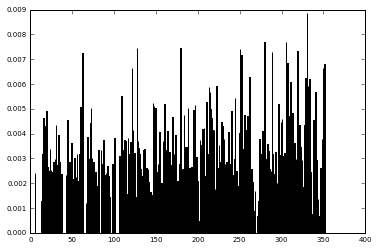

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(centralities.keys(), centralities.values())

Applying what we learned earlier, let's use the **"degree centrality"** metric as well.

<Container object of 300 artists>

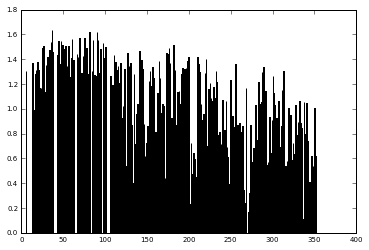

In [14]:
decentrality = nx.degree_centrality(G)
plt.bar(decentrality.keys(), decentrality.values())

The code above should have demonstrated to you the basic logic behind storing graph data in a human-readable format. For the richest data format, you can store a node list with attributes, and an edge list (a.k.a. adjacency list) with attributes.

# Saving NetworkX Graph Files

NetworkX's API offers many formats for storing graphs to disk. If you intend to work exclusively with NetworkX, then pickling the file to disk is probably the easiest way.

To write to disk: 

    nx.write_gpickle(G, handle)

To load from disk:
    
    G = nx.read_gpickle(handle)
    
Let's write the graph to disk so that we can analyze it further in other notebooks.

In [15]:
nx.write_gpickle(G, 'datasets/divvy_2013/divvy_graph.pkl')